### Some Other Key Python Visualisations

In this notebook, we'll see a few more basic examples of important visualisation types in Python - bar charts/histograms, and heatmaps.

### Histograms/Bar Charts

The histogram, and the very closely related bar chart, are powerful tools. Both types of chart are used to compare counts/frequencies of a value across a set of data bins. Strictly speaking, a "bar chart" is used where your data binning is *categorical*, while a "histogram" is used where your data bins represent *value ranges* into which *quantitative data* has been binned.

In practice, however, there is little difference between them for plotting in Python; the distinction is really only in how you have binned your data beforehand.

A common place to find a bar chart is in demographic data, so that makes a great place for us to start. For now, we'll carry on with data from the CLUE survey, and delve deeper into the demographics of the suburbs we've been comparing, by creating a bar chart showing how their populations break up into different age ranges.

We'll just look at the two suburbs which were on the extremes of the distribution in the last notebook: Carlton, with the lowest median income, and a low median age; and East Melbourne, with the highest median income, and a high median age.

First, though, we'll get set up with our most important tools:

In [21]:
import pandas as pd
import matplotlib.pyplot as pl
%matplotlib inline

Now we'll load our data. Adapt the next cell to read in the file ``'suburb_demographics.csv'`` as ``df``.

In [22]:
#df = 'suburb_demographics.csv'
df = pd.read_csv('suburb_demographics.csv') 

display(df)

,geography,year,topic,category,sub_category,value_description,value
0,Carlton,2016,Residents: Age and gender,Age - key groups,Children (0-11 years),Count of persons,858
1,Carlton,2016,Residents: Age and gender,Age - key groups,Youth (12-25 years),Count of persons,9532
2,Carlton,2016,Residents: Age and gender,Age - key groups,Adult (26-59 years),Count of persons,6818
3,Carlton,2016,Residents: Age and gender,Age - key groups,Older (60 years and over),Count of persons,1556
4,East Melbourne,2016,Residents: Age and gender,Age - key groups,Children (0-11 years),Count of persons,184
5,East Melbourne,2016,Residents: Age and gender,Age - key groups,Youth (12-25 years),Count of persons,561
6,East Melbourne,2016,Residents: Age and gender,Age - key groups,Adult (26-59 years),Count of persons,2666
7,East Melbourne,2016,Residents: Age and gender,Age - key groups,Older (60 years and over),Count of persons,1278
8,Carlton,2011,Residents: Age and gender,Age - key groups,Children (0-11 years),Count of persons,816
9,Carlton,2011,Residents: Age and gender,Age - key groups,Youth (12-25 years),Count of persons,6528


Here, I've included all the columns that came in the raw data file from the City of Melbourne's raw data file. We don't need them all, but it may help to contextualise the values (as well as begin to accustom us to the colourful variety of data formats we encounter doing data science).

First, we'll use a bar chart to plot the demographic breakdown of Carlton in 2016. How many people are in each age bin? To do this, we'll first need to filter the dataset down to only the data we're interested in. Add a condition to the below to filter to 2016 only:

In [ ]:
carlton_2016 = df.loc [ (df['geography'] == "Carlton") & ( ]

display(carlton_2016)

As before, we can create a bar chart using a Pandas built-in, ``df.plot.bar()``. This has the syntax: ``dataframe.plot.bar( x = 'x_column_name', y = 'y_column_name')``. Here, x should be the name of the column holding your categories, and y should be the name of the column with your counts/frequencies. We want x to be our age groups, and y to be our count of people.

In [ ]:
carlton_2016.plot.bar( x = 'sub_category', y = 'value') ;

   This method also has a handy option, ``rot``, for rotation of the x-axis labels. If we don't supply an argument ``rot=....``, then it is set to zero by default: this corresponds to verticaly axis labels. rotate the axis labels. However, we can add the argument ``rot=90`` to our plotting function, above, to rotate by 90 degrees, and print them horizontally. Try it below, and then try some other values to find one that you find most legible.

In [ ]:
# Fix this command, and then alter it to add an axis rotation

carlton_2016.plot.bar( x = 'sub_category', z = 'value') ;

Now, have a go yourself: make an equivalent plot for East Melbourne in 2016:

In [23]:
# Plot a bar chart showing the age demographics of East Melbourne in 2016:




## Bar charts in Matplotlib

Creating similar plots directly in Matplotlib is not terrifically difficult. Matplotlib's bar chart plotting syntax is as follows: ``pl.bar( x, y )``. Here, ``y`` should be the vector (ie list, series, or array) of frequencies/counts, like always. ``X`` should be the vector of category names (or you can pass a vector of desired bar *positions*, and add your category names later, manually). 

Now let's create a chart using ``pl.bar( x, y )`` with the carlton_2016 x and y data you created above. For fun, try changing the colour of the bars by adding the optional extra argument ``color = 'something'`` to pl.bar(). You can revist colour definitions in the last workbook if you need to.

In [ ]:
pl.bar( ... , carlton_2016['value'], ...)

When we work directly in Matplotlib, our labels come out horizontal by default. However, we can change this manually.

To do this, we will meet an important element of our Matplotlib "Figure" canvas: the "ticks". 

The "ticks" are the little measurement markers on your axis. Wrangling them so that your figure shows what you want is a frequent and sometimes challenging task. Whenever you are working on a Matplotlib Figure (or axis; we'll talk about them later), that figure has ``xticks`` and ``yticks`` attributes. 

By passing arguments to these, we can control their appearance in detail (see https://matplotlib.org/3.1.0/api/text_api.html#matplotlib.text.Text for a glimpse of some of the properties we can control for text-based features in Matplotlib). Related methods let us control tick positioning when we need to. 


In [ ]:
pl.bar( carlton_2016['sub_category'], ['value'], color = 'indigo')
pl.xticks( rotation=45 );


Here, we have changed the colour of the plot using the ``colour='...'`` argument. But we can almost always control the appearance of our plot elements in much more detail. Here are just some examples of arguments we can add to our ``pl.bar()`` command, to control appearance.

* edgecolor = 'any colour string' --> will control the colour of the bar outlines
* linewidth = an integer (normally <10) --> control thickness of bar outlines. Normal width is 1.
* linestyle = a linestyle shortcut (eg '--', '-.') --> control style of bar outlines, eg dashed, dot-dashed
* fill = either True or False (boolean) --> to control whether the bars are coloured in
* hatch = any of the strings '/', '\', '|', '-', '+', 'x', 'o', 'O', '.' --> crosshatch the bars
* **alpha = a float between 0 and 1 --> control transparency of bars (0 = totally transparent; 1 = totally opaque)**

Just like we did before, when we create bar elements, we can also pass a ``label = 'My Desired Label'`` argument in the ``pl.bar()`` call, to record what we would like those elements to be labelled as in the legend.


## Exercise 1:

Create a single plot in Matplotlib comparing the Carlton and East Melbourne demographics. Your plot should:

* Contain bars showing the carlton_2016 data, in a colour of your choosing OR with no fill at all. Give these bars a a thick dashed outline.
* Contain bars showing the emelb_2016 data, in a contrasting colour, with a thick outline, and with a transparency of 0.6
* Label both sets of bars, and add a legend
* Rotate the x tick labels to 45 degrees
* Add a y label and a title

Hint: Do East Melbourne *after* Carlton, so the East Melbourne bars sit on top of the Carlton bars

Hint 2: Choose your colours so that it is easy to make out the difference between the two data sets.

In [24]:
## Create your plot here.




**Totally optional** extra exercise, for speedsters: make a similar plot, but with the 2011 data from suburb_demographics.csv. And/or, make a similar plot, but make one set of bars using Carlton's 2011 data, and one set of bars with Carlton's 2016 data.


### Two Dimensional Histograms: AKA Heatmaps Part I

What if it was not just our x data that fell into bins? 

Consider the following plots*, which show the distribution of latitude and longitude of the more than 70,000 trees in the City of Melbourne (from the Urban Forest Project, on the City of Melbourne's Open Data Portal). 

***A quick note**: here, we see an example of Matplotlib's ``pl.hist()`` function. When passed a vector of numerical data, this function will automatically bin the data into a default of ten bins (adjustable with the ``bins=n`` argument), and plots those bins as a histogram. This function is quite simple, but useful; I've not discusseed it in detail here due to time constraints, but feel encouraged to play around with bin numbers below, or create your own vector of  numbers to  bin and plot (try ``x = np.random.randn(1000) `` then ``pl.hist(x)``). And please ask for more discussion if you are interested!


In [ ]:
import pandas as pd
import matplotlib.pyplot as pl

trees_df = pd.read_csv('melbourne_trees.csv')

pl.hist(trees_df['Latitude'], edgecolor='k')

pl.xlabel('Tree Latitude')
pl.ylabel('Count of Trees in Latitude Bin');

In [ ]:
pl.hist(trees_df['Longitude'], edgecolor='k');
pl.xlabel('Tree Longitude')
pl.ylabel('Count of Trees in Longitude Bin');

These two plots are not very informative when separate. To get a real sense of the data distribution, we need to put both sets of information into the same visualisation.

Luckily, Matplotlib comes to our rescue with a convenient tool - ``pl.hist2d``.

This function returns a two-dimensional histogram, or bivariate histogram, where the values are chunked into bins on *both* the x and y axis. This is easier to understand from an example:


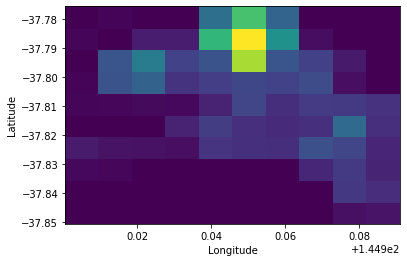

In [51]:
pl.hist2d(trees_df['Longitude'],trees_df['Latitude'])
pl.xlabel('Longitude')
pl.ylabel('Latitude');

Conceptually, what Python has done is to divide our plot area into a little latitude/longitude grid, and to calculate the number of trees that fall into each grid square. Then, it colours that square according to how many trees are there - the more yellow, the more trees.

This kind of plotting approach - a 2d pixel grid where the *intensity* of a pixel corresponds to some dimension of the data at that point - is usually called a heatmap, or intensity map. There are many ways to make heatmaps, as we'll see below, and ``pl.hist2d()`` is actually a rather unusual one. 

However, let's point out some useful things before we finish:

* **Q1: Why does the y axis have such weird ticks?**

Python tries to figure out what the most useful format for a tick will be, and it often thinks that longer tick labels are harder to read. So, when all the ticks are greater than a certain value, it will occasionally apply an 'offset' to the tick values. Here, it is +1.449e2, ~144.9. The offset is printed at the top, and the y-axis tick values should be read as 'the printed tick value + the offset'.

In this case, however, this actually does not improve legibility of the plot. Let's get rid of the offset, using another 'ticks' method.

In [ ]:
pl.hist2d(trees_dataframe['Longitude'],trees_df['Lattude'])

pl.xlabel('Longitude')
pl.ylabel('Latitude')

pl.ticklabel_format(useOffset=False);

* **Q2: Isn't the "resolution" a bit low?**

Yes. Whenever we make a histogram, it's important to consider what an appropriate size is for the bins we use. So far, we haven't done that here - we've let ``pl.hist2d()`` take care of it by default. By default, it has binned our ~70,000 data points into 10 bins along the x axis, and 10 bins along the y axis. This makes for pretty big bins - a "coarse binning".

But with this much data, we can expect to have a bit of fine structure resolved in our dataset, which will not be reflected with this coarse binning. We can try to bring out more structure by binning more finely, if we just give ``pl.hist2d()`` a tuple telling it how many bins to use. This is the ``bins=(num_xbins, num_ybins)`` argument.

In [ ]:
pl.hist2d(trees_df['Longitude'],trees_df['Latitude'], bins = (50,50))

pl.xlabel('Longitude')
pd.ylabel('Latitude')

pl.ticklabel_format(useOffset=False);

In [ ]:
# Reproduce the above, but use 100 by 100 bins

# Do this one in a slightly larger figure, so you can see it better:
pl.figure(figsize=(10,10))


.....



You should now be able to see some familiar geographical and urban features appearing - city street traces; the greenery of Melbourne Zoo and surrounds, and the curve of the Yarra River.  By choosing a more suitable resolution for our heatmap, we have been able to bring out the salient features of the data. 

* **Q3: What do the different colours mean?**

**Good question!** 

### Colourmaps

The different colours represent the count of trees in each grid square. In this case, more purple colours = squares with less trees, and more yellow colours represent squares with more trees. 

When Matplotlib makes heatmaps, it uses something called a 'colourmap' (or colormap) to decide how to turn gridded values into colours - that is, how to *map* colours to values.

When we've used a colourmap, we can always see what colours correspond to which values directly, by adding a "colour scale" or "colourbar" to our plots. This is achieved using the ``pl.colorbar()`` method.



In [ ]:
pl.figure(figsize=(12,10))

pl.bar(trees_df['Longitude'],trees_df['Latitude'], bins = (100,100))

pl.xlabel('Longitude')
pl.ylabel('Latitude')

pl.ticklabel_format(useOffset=False)

pl.colorbar();

Reading from the colourbar, we can see that the most populated grid square has around 600 trees in it (yellow coloured), and the least populated grid squares have around 0 trees in them.

Importantly, **we can choose which colormap we wish to use** - we do not have to go with the default purple-to-yellow you see here. 

In fact, choosing a suitable colour palette and colour map can be a crucial part of your data visualisation, so it is worth spending some time to consider what would be a good colour-based representation of your dataset. 

This is a topic on which there is much to be said; for a brief introduction and some technical considerations, see: https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html. 

You can see a gallery of the colourmaps which Matplotlib uses at: https://matplotlib.org/3.1.1/gallery/color/colormap_reference.html. 

To change the colourmap, we can simply pass the name of a colourmap to ``pl.hist()``* as a final argument ``cmap = 'name of desired colourmap' ``.

*we can do the same in other plotting methods, too.

For this dataset, which measures greenery, it might make sense to use the colourmap 'Greens', which has higher values coded increasingly deep green.

In the cell below, add a ``cmap=...`` argument to ``pl.hist2d()`` below to give this a try.

In [ ]:
pl.figure(figsize=(12,10))
pl.hist2d(trees_df['Longitude'],trees_df['Latitude'],bins=(100,100), ...)

pl.xlabel('Longitude')
pl.ylabel('Latitude')

pl.ticklabel_format(useOffset=False)

pl.colorbar();

However, when we look at it, 'Greens' may arguably not actually be a wonderful choice for this data - it's a little washed out. Try some different colour schemes in the cell above until you find one you prefer.

It is also worth noting that it's possible (and, often, desirable) to define your own colourmaps, or otherwise wrangle your visualisation colours in very customised ways. However, this is beyond scope for today.

Instead, we'll finish with a quick exercise that puts this workbook's content together with the last workbook's content. 

Let's revisit 'scatter' once again, to note (as we did earlier) that it is possible to pass ``pl.scatter()`` a colour argument: remember ``pl.scatter(x, y, c='colour')``? If we have a vector (say, named ``colours``) of *numerical values* by which we would like to colour-code our scatter points x and y, we can do so by passing ``pl.scatter(x, y, c=colours)``. Here is a toy example:

In [ ]:
x = [1, 2, 3]
y = [8, 7, 6]
colours = [-5,0,5]

pl.scatter(x, y, c=colours)

pl.colormap();

We can also use a colourmap to choose the colours which will be used to represent our data values:

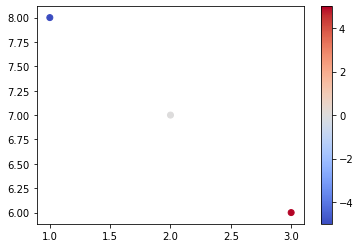

In [14]:
x = [1, 2, 3]
y = [8, 7, 6]
colours = [-5,0,5]

pl.scatter(x, y, c=colours, cmap = 'coolwarm')

pl.colorbar();

### Exercise 2:

Bring together some of what you have learned in this notebook and the last notebook by creating the following figure:

* Create a scatter plot of Melbourne tree locations by longitude/latitude.
* Assign colours to the scattered points based on the year they were planted, by using ``trees_df['Year Planted']`` as your colours vector.
* Choose and apply a non-default colourmap of your choice by passing a ``cmap = ...`` argument
* Make your scatter points semitransparent by passing an argument like ``alpha=0.3`` to your ``pl.scatter`` call. This will mean that when points overlap, we can still see the "underneath" points, and get a sense of the whole dataset with nothing totally obscured. Play around with values between 0 and 1 until you find one that strikes a nice visual balance.
* Make the plot big enough to see clearly by resizing it with a ``figsize``
* Add axis labels and a title to your plot
* Add a colourbar to the plot


In [80]:
# Create your figure here....




When we create a scatter plot with very many points like this, it has an *almost* heatmap-like effect, giving a sense of the data "intensity" over the plot parameter space. This can be a very effective way to get that effect, without having to create data that "fills in" the whole plot space. However, strictly speaking, this is *not* a heatmap; it's still a scatter plot, but just one with a nice visual effect.

There are a number of other ways to create true heatmaps, and a number of important related concepts in visualisation. However, we'll pick these up on Tuesday. 

Thanks!